<a href="https://colab.research.google.com/github/jpmedras/inf450_2023-1/blob/main/ajnpr_de_inf450_2023_TrabalhoCacheWriteback_FSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho inf450 Cache Write-back

* Cache Mapeamento Direto
* Write-back
* Máquina de estados para Teste da Cache
  * Ler um sequencia da memoria

  
posicao | operacao | endereco | dado
---     | ---      | ---|---
0 | 0 (read) | 30 |
1 | 1 (write) | 21 | 3
... |
10 | 1 (write) | 44 | 1

* O sistema deve monitorar o total de ciclos para a execução da sequencia
* Mostrar o número de MISS


[playlist com explicações](https://www.youtube.com/playlist?list=PLcvOyD_LMr6kDv1GhR8eLMkzxwKzXGDvo)



# Referencias

* Fazer as adaptações no trabalho de cache  [Colab Mapeamento Direto em Verilog](https://colab.research.google.com/drive/1bh5ODMjvlMs8Zem0-SQ6tOvOpMCL16Ob?usp=sharing)



* Referências para Memória [com colab](https://colab.research.google.com/drive/1EKR4iBx_EGQgHr4tDHwQXRv_OY65b5CP?usp=sharing)



# Maquina de Estados com Write-back

## [Descrição do projeto](https://excalidraw.com/#json=NUkS9gpN7MOLbnIfPlsuJ,lbAEMzmIIlkMNQfdWim_Yg)

## Diagrama da Maquina

* Alterar a FSM da read-only

In [ ]:

from graphviz import Digraph
e = Digraph('fsmCache', filename='fsmCache.gv')

e.attr('node', shape='box')

with e.subgraph() as s:
    s.attr(rank='bottom')
    s.node('ReadData', label = 'ReadData Done == 1')
    s.node('ReadTag', label = 'ReadTag Cnt == 1 & Mux == 0',shape="box3d")
    s.node('WriteData', label = 'WriteData Done == 1')

e.edge('ReadTag','ReadData','c & v & ~op')
e.edge('ReadTag','ReadBlock','~c & v & w & ~op')
e.edge('ReadTag','WriteBlock','(~v & ~op) | (~c & ~w & ~op)')


with e.subgraph() as s:
    s.attr(rank='top')
    s.node('ReadBlock', label = 'ReadBlock Dwr == 1 & RAMr == 1 & 1 Mux == 1')
    s.node('UpdateTag', label = 'UpdateTag Twr == 1')
    s.node('WriteBlock', label = 'WriteBlock \n RAMwr == 1 & Mux == 1')

e.edge('ReadData','ReadTag')
e.edge('ReadBlock','UpdateTag','END');
e.edge('ReadBlock','ReadBlock','¬END')
e.edge('WriteBlock','WriteBlock','¬END')
e.edge('WriteBlock','ReadBlock','END')
e.edge("UpdateTag","ReadData", '~op')

with e.subgraph() as s:
    s.node('WriteData', label = 'WriteData Done == 1 Dwr == 1')
    #s.node('WriteData', label = 'WriteData Done == 1')
    s.node('UpdateDirty', label = 'UpdateDirty Wwr == 1')

e.edge('ReadTag','WriteBlock', '~c & v & w & op')
e.edge('ReadTag','ReadBlock','(~v & op) | (~c & ~w & op)');
e.edge('ReadTag','WriteData','(c & v & op)');
e.edge('UpdateTag','UpdateDirty','op');
e.edge('UpdateDirty','WriteData');
e.edge('WriteData', 'ReadTag')

e.view()


# assign wRAM = (~c & v & w);
# assign rRAM = (~v) | (~c & ~w);
# assign rCache = (c & v);

'fsmCache.gv.pdf'

In [ ]:

from graphviz import Digraph
e = Digraph('fsmCache', filename='fsmCache.gv')

e.attr('node', shape='box')

with e.subgraph() as s:
    s.attr(rank='bottom')
    s.node('ReadData', label = 'ReadData Done == 1')
    s.node('ReadTag', label = 'ReadTag Cnt == 1 & Mux == 0',shape="box3d")
    s.node('WriteData', label = 'WriteData Done == 1')

e.edge('ReadTag','ReadData','c & v & ~op')
e.edge('ReadTag','ReadBlock','(~v) | (~c & ~w)')
e.edge('ReadTag','WriteBlock','~c & v & w')


with e.subgraph() as s:
    s.attr(rank='top')
    s.node('ReadBlock', label = 'ReadBlock Dwr == 1 & Mux == 1')
    s.node('UpdateTag', label = 'UpdateTag Twr == 1')
    s.node('WriteBlock', label = 'WriteBlock \n RAMwr == 1 & Mux == 1')

e.edge('ReadData','ReadTag')
e.edge('ReadBlock','UpdateTag','RB_End');
e.edge('ReadBlock','ReadBlock','¬RB_End')
e.edge('WriteBlock','ReadBlock','WB_End')
e.edge('WriteBlock','WriteBlock','¬WB_End')
e.edge("UpdateTag","ReadData", '~op')

with e.subgraph() as s:
    s.node('WriteData', label = 'WriteData Done == 1 Dwr == 1')
    s.node('UpdateDirty', label = 'UpdateDirty DTwr == 1')

e.edge('ReadTag','WriteData','c & v & op');
e.edge('UpdateTag','UpdateDirty','op');
e.edge('UpdateDirty','WriteData');
e.edge('WriteData', 'ReadTag')

e.view()


# assign wRAM = (~c & v & w);
# assign rRAM = (~v) | (~c & ~w);
# assign rCache = (c & v);

'fsmCache.gv.pdf'

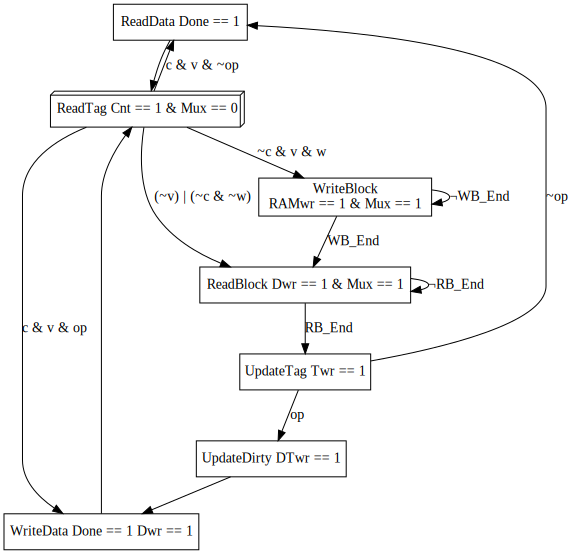

In [ ]:
#@title Final State Machine Visualization
from graphviz import Source
Source.from_file('fsmCache.gv') # visualizando

## Código Verilog

[esboço das mudancas](https://excalidraw.com/#json=tA8BlVuaEDYLh1P6uK1IV,wtL9VBNzucDj81_xj67iAA)

* criar uma memoria de 1 bit (clonar a memoria de valido) para anotar se os dados mudaram na cache (write back).


# Projeto da Cache Mapeamento Direto com Write-back

Adaptar a cache só de leitura.

# Funções para Visualizar o Resultado

* Mostrar a Cache
* Mostrar as células de memória que foram atualizadas

# Maquina de Estados para Consulta e Teste da Cache